In [4]:
lyamda = 0.5
mu = 1
n = 10000
h = 0.001 #шаг
r = lyamda / mu

def factorial(n):
    f = 1;
    i = 1;
    while i <= n:
        f *= i;
        i += 1;
    return f;

print("По формулам Эрланга:");
k = 5; #Число каналов + 1
r = lyamda / mu;
sum = 0
for i in range (k):
    sum += pow(r, i) / factorial(i);
p0_e = 1 / sum;
for i in range (k):
    print("P", i," = {:.5}".format(pow(r,i) / factorial(i) * p0_e), sep = '');



По формулам Эрланга:
P0 = 0.60664
P1 = 0.30332
P2 = 0.075829
P3 = 0.012638
P4 = 0.0015798


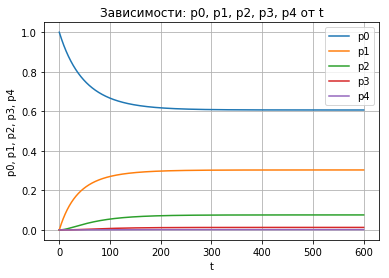

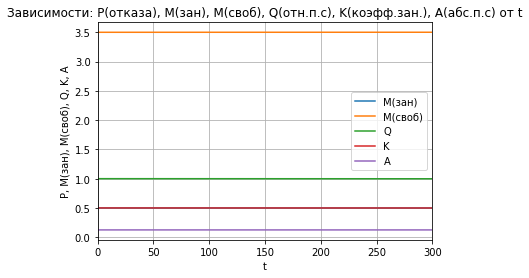

Численное интегрирование методом Эйлера:
P0 = 0.60665
P1 = 0.30331
P2 = 0.07582
P3 = 0.01264
P4 = 0.00158
Вероятность отказа = P(4) = 0.00158
Среднее число занятых линий = 0.49921
Среднее число свободных линий = 3.50079
Относительная пропускная способность системы = 0.99842
Абсолютная пропускная способность системы = 0.49921
Коэффициент занятости узлов обслуживания = 0.12480


In [5]:
import matplotlib.pyplot as plt #Библиотека для рисования графиков

#import openpyxl
# создаем новый excel-файл
#wb = openpyxl.Workbook()
# добавляем новый лист
#wb.create_sheet(title = 'Первый лист', index = 0)
# получаем лист, с которым будем работать
#sheet = wb['Первый лист']

# Метод Эйлера
p0 = 1
p1 = 0;
p2 = 0
p3 = 0
p4 = 0
t = 0

#Массивы для графиков
p0_res = [0] * (n)
p1_res = [0] * (n)
p2_res = [0] * (n)
p3_res = [0] * (n)
p4_res = [0] * (n)
t_res = [0] * (n)
p_res = [0] * (n)
M1_res = [0] * (n)
M2_res = [0] * (n)
Q_res = [0] * (n)
K_res = [0] * (n)
A_res = [0] * (n)

#цикл на n - итераций
for i in range(n):
    t_res[i] = t * 60
    t += h;
    p0_res[i] = p0
    p1_res[i] = p1
    p2_res[i] = p2
    p3_res[i] = p3
    p4_res[i] = p4
    p_res[i] = p4
    M1_res[i] = r * (1 - p4)
    M2_res[i] = 4 - r * (1 - p4)
    Q_res[i]= 1 - p4
    K_res[i] = lyamda * (1 - p4)
    A_res[i] = r * (1 - p4) / 4
    
    #Расчет решение системы дифференциальных уравнений
    p0_next = p0 + h * (-lyamda * p0 + mu * p1)
    p1_next = p1 + h * ( -(lyamda + mu) * p1 + lyamda * p0  + 2 * mu * p2)
    p2_next = p2 + h * ( -(lyamda + 2 * mu) * p2 + lyamda * p1  + 3 * mu * p3)
    p3_next = p3 + h * ( -(lyamda + 3 * mu) * p3 + lyamda * p2  + 4 * mu * p4)
    p4_next = p4 + h * (lyamda * p3 - 4 * mu * p4)
    
    p0 = p0_next; p1 = p1_next; p2 = p2_next; p3 = p3_next; p4 = p4_next 
    

# Построение графика
plt.title("Зависимости: p0, p1, p2, p3, p4 от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("p0, p1, p2, p3, p4")    # ось ординат
plt.grid()              # включение отображение сетки

plt.plot(t_res, p0_res, label = "p0")# построение графика
plt.plot(t_res, p1_res, label = "p1")# построение графика
plt.plot(t_res, p2_res, label = "p2")# построение графика
plt.plot(t_res, p3_res, label = "p3")# построение графика
plt.plot(t_res, p4_res, label = "p4")# построение графика
plt.legend() #добавим легенду
plt.show() #показ графика

# Построение графика
plt.title("Зависимости: P(отказа), М(зан), М(своб), Q(отн.п.с), K(коэфф.зан.), А(абс.п.с) от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("P, М(зан), М(своб), Q, K, А")    # ось ординат
plt.grid()              # включение отображение сетки

#plt.plot(t_res, p_res, label = "P")# построение графика
plt.plot(t_res, M1_res, label = "M(зан)")# построение графика
plt.plot(t_res, M2_res, label = "M(своб)")# построение графика
plt.plot(t_res, Q_res, label = "Q")# построение графика
plt.plot(t_res, K_res, label = "K")# построение графика
plt.plot(t_res, A_res, label = "A")# построение графика
plt.legend() #добавим легенду
plt.xlim(0, 300)  #ограничим ось абсцисс
plt.show() #показ графика

print("Численное интегрирование методом Эйлера:")
print("P0 = {:.5f}\nP1 = {:.5f}\nP2 = {:.5f}\nP3 = {:.5f}\nP4 = {:.5f}".format(p0, p1, p2, p3, p4))
p_n = pow(r,(k - 1)) / factorial(k - 1) * p0_e;
print("Вероятность отказа = P(4) = {:.5f}".format(p_n));
print("Среднее число занятых линий = {:.5f}".format(r * (1 - p_n)));
print("Среднее число свободных линий = {:.5f}".format((k - 1) - r * (1 - p_n)));
print("Относительная пропускная способность системы = {:.5f}".format(1 - p_n));
print("Абсолютная пропускная способность системы = {:.5f}".format(lyamda * (1 - p_n)));
print("Коэффициент занятости узлов обслуживания = {:.5f}".format(r * (1 - p_n) / (k - 1)));
